In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle as pkl
%matplotlib inline

# Extraction

In [2]:
data = pd.read_csv("./data/breast_cancer_wisconsin_data.csv", index_col="id")

# Transform 
Loading the dataset and inspecting the data. Includes corrections.

In [3]:
data.head(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN


In [4]:
data.tail(3)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [5]:
del data["Unnamed: 32"]

In [6]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se            

In [8]:
data[data.isna()].count()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [9]:
ls = [1,2,3]
ls[:2]

[1, 2]

In [10]:
mean_data = data.iloc[:,1:11]
se_data = data.iloc[:,11:21]
worst_data = data.iloc[:,21:31]

In [11]:
mean_data.shape

(569, 10)

In [12]:
mean_data.iloc[0]

radius_mean                 17.99000
texture_mean                10.38000
perimeter_mean             122.80000
area_mean                 1001.00000
smoothness_mean              0.11840
compactness_mean             0.27760
concavity_mean               0.30010
concave points_mean          0.14710
symmetry_mean                0.24190
fractal_dimension_mean       0.07871
Name: 842302, dtype: float64

In [13]:
se_data.shape

(569, 10)

In [14]:
se_data.iloc[0]

radius_se                 1.095000
texture_se                0.905300
perimeter_se              8.589000
area_se                 153.400000
smoothness_se             0.006399
compactness_se            0.049040
concavity_se              0.053730
concave points_se         0.015870
symmetry_se               0.030030
fractal_dimension_se      0.006193
Name: 842302, dtype: float64

In [15]:
worst_data.shape

(569, 10)

In [16]:
worst_data.columns

Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

# Explore

In [18]:
diagnosis_df = data.replace(to_replace=["B", "M"], value=["Benign", "Malign"])
diagnosis_df.rename(columns = {"diagnosis":"Diagnosis"},inplace=1)
diagnosis_df.head(3)

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,Malign,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,Malign,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,Malign,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758


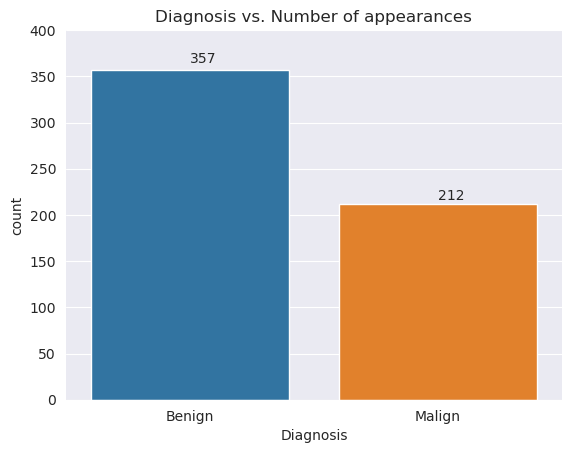

In [19]:
sns.set_style('darkgrid')

plt.title("Diagnosis vs. Number of appearances")
plt.ylim(0,400)
counts = [len(data[data["diagnosis"] == x]) for x in "B M".split()]
for i in range(len(counts)):
    plt.annotate(counts[i], (i,counts[i] * 1.02))
cplot = sns.countplot(x="Diagnosis", data=diagnosis_df, order="Benign Malign".split())
sns.despine(left=True);
cplot.figure.savefig("countplot.png")

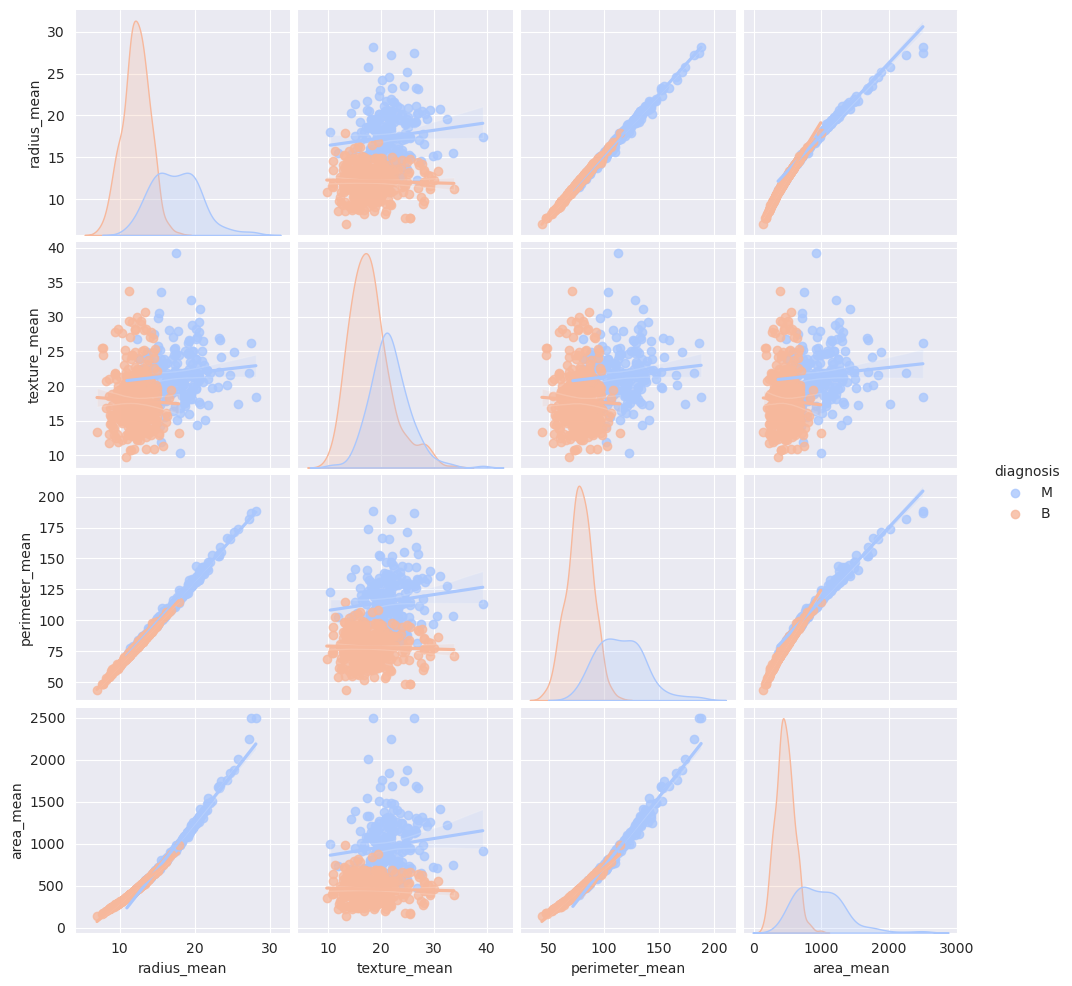

In [20]:
pairplot1 = sns.pairplot(data=data, vars=["radius_mean","texture_mean","perimeter_mean","area_mean"], hue="diagnosis", kind="reg", palette="coolwarm");
pairplot1.figure.savefig("pairplot1.png")

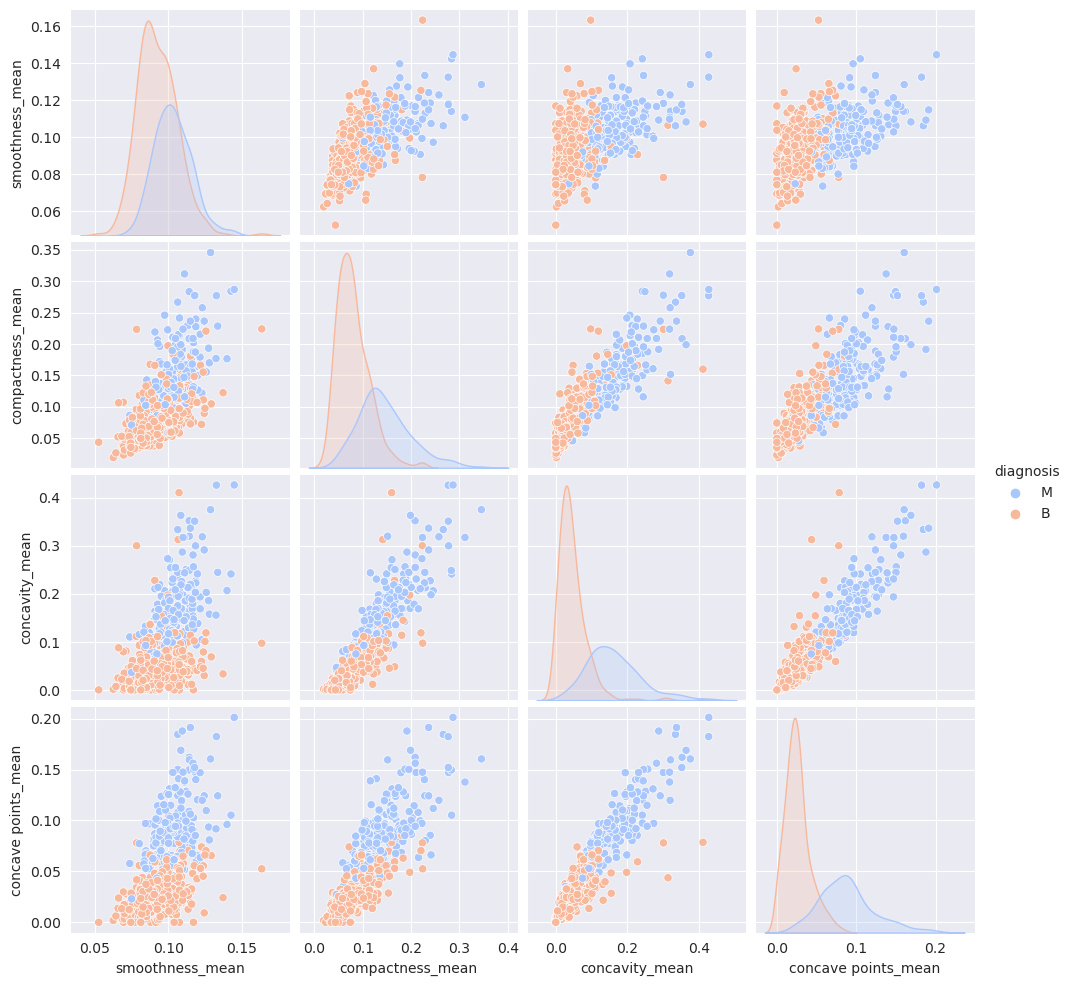

In [21]:
pairplot2 = sns.pairplot(data=data, vars=["smoothness_mean","compactness_mean","concavity_mean","concave points_mean"], hue="diagnosis", kind="scatter", palette="coolwarm");
pairplot2.figure.savefig("pairplot2.png")

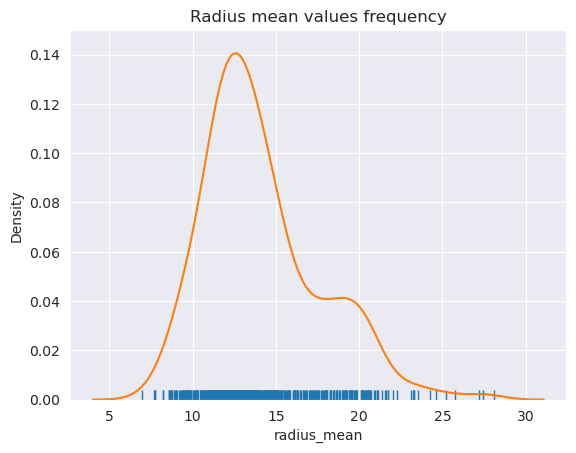

In [22]:
plt.ylim(0,0.15)
plt.title("Radius mean values frequency")
sns.rugplot(data["radius_mean"])
kdeplot = sns.kdeplot(data["radius_mean"]);
kdeplot.figure.savefig("kdeplot.png")

In [25]:
data.replace(["B", "M"], [0, 1], inplace=True)

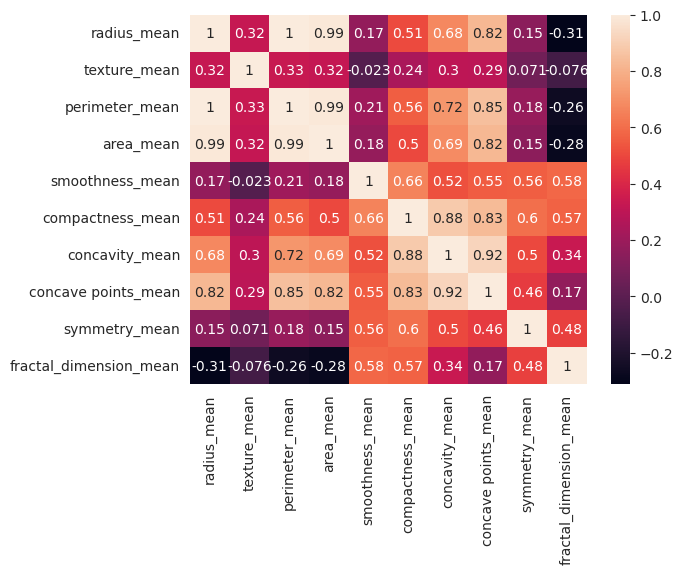

In [30]:
sns.heatmap(mean_data.corr(), annot=True);